# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


# Below is the code I wrote that I cannot for the life of me get to work. Error 400 every time. I C&P code for that cell only and changed the code to work for my stuff. Everything else is handwritten. Not plagerism.. hopefully. 

In [3]:
#base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

#query_url = base_url + "&appid=" + weather_api_key + "&q"

#lists

#city_me = []
#temp_f = []
#humidity = []
#cloudiness = []
#wind_speed = []
#lon = []
#lat = []

#record = 1  

#print(f'go go gadget')


#please let this for loop work dear god

#for city in cities:
#   try:
#        response = requests.get(f'{query_url}{city}').json()

#        city_me.append(response['name'])
#        temp_f.append(response['main']['temp'])
  #      humidity.append(response['main']['humidity'])
   #    wind_speed.append(response['wind']['speed'])
    #    lon.append(response['coord']['lon'])
     #   lat.append(response['coord']['lat'])


      #  print(f'Record {record} : {city}')
       # record = record + 1
        
 #   except KeyError:
#        print(f'still an idiot, sarah')


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# query url
query_url = base_url + "&appid=" + weather_api_key + "&q="

#Create Empty Lists 
city_me = []
temp_f = []
humidity = []
cloudiness = []
wind_speed = []
lon = []
lat = []

record = 1

print(f'Go go gadget')


# Loop through the cities and perform API Calls
for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
                
        city_me.append(response["name"])
        temp_f.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        lon.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        
        print(f'Record {record} : {city}')
        record = record + 1
   
    except KeyError:
        print(f'That is not a place, fool')

Go go gadget
Record 1 : kavaratti
Record 2 : acari
That is not a place, fool
Record 3 : khatanga
Record 4 : brae
Record 5 : moron
That is not a place, fool
Record 6 : mahebourg
Record 7 : thompson
Record 8 : arraial do cabo
Record 9 : sonepur
Record 10 : lagoa
Record 11 : sangmelima
Record 12 : busselton
Record 13 : sorland
Record 14 : neiafu
Record 15 : ussel
Record 16 : ponta do sol
Record 17 : kaitangata
Record 18 : sao filipe
Record 19 : ribeira grande
Record 20 : killarney
Record 21 : port alfred
That is not a place, fool
That is not a place, fool
Record 22 : bathsheba
Record 23 : lebu
Record 24 : gobabis
Record 25 : tiksi
Record 26 : moratuwa
Record 27 : bredasdorp
Record 28 : aswan
Record 29 : caravelas
Record 30 : chivana
Record 31 : vaini
Record 32 : hilo
Record 33 : jamestown
Record 34 : ushuaia
Record 35 : bouza
Record 36 : punta arenas
Record 37 : butaritari
Record 38 : cape town
Record 39 : east london
Record 40 : geraldton
Record 41 : mezhdurechensk
Record 42 : hermanus
R

Record 337 : pangnirtung
Record 338 : kindersley
Record 339 : la union
Record 340 : pecos
Record 341 : guerrero negro
Record 342 : launceston
That is not a place, fool
Record 343 : bagdarin
Record 344 : biak
Record 345 : tawau
Record 346 : khasan
Record 347 : pinawa
Record 348 : naze
Record 349 : arak
Record 350 : bata
Record 351 : auki
That is not a place, fool
Record 352 : mahanje
Record 353 : oruro
Record 354 : abidjan
Record 355 : bambous virieux
Record 356 : celestun
Record 357 : gongzhuling
Record 358 : viking
Record 359 : mount isa
Record 360 : erdenet
Record 361 : gao
That is not a place, fool
Record 362 : chapais
Record 363 : bisho
Record 364 : saskylakh
Record 365 : shahreza
Record 366 : debre sina
Record 367 : anadyr
Record 368 : steinbach
Record 369 : kiruna
Record 370 : carbunesti
Record 371 : verkhnyaya inta
Record 372 : mbuji-mayi
Record 373 : aitape
Record 374 : killybegs
Record 375 : noumea
Record 376 : ketchikan
Record 377 : ganzhou
Record 378 : charters towers
That i

In [6]:
### Convert Raw Data to DataFrame
#Export the city data into a .csv.


total_cities = pd.DataFrame({"City": city_me, 
                              "Temperature": temp_f,
                              "Humidity": humidity,
                              "Cloud Cover (%)": cloudiness,
                              "Wind Speed": wind_speed, 
                              "Log": lon, 
                              "Lat": lat})
total_cities.to_csv("total_cities.csv")
total_cities.count()                              

City               567
Temperature        567
Humidity           567
Cloud Cover (%)    567
Wind Speed         567
Log                567
Lat                567
dtype: int64

In [7]:
#Display the DataFrame
total_cities.head()

,City,Temperature,Humidity,Cloud Cover (%),Wind Speed,Log,Lat
0,Kavaratti,82.33,60,31,9.69,72.6420,10.5669
1,Acarí,65.21,75,54,4.36,-74.6158,-15.4311
2,Khatanga,-4.09,99,96,3.87,102.5000,71.9667
3,Brae,51.62,88,100,9.08,-1.3530,60.3964
4,Morón,70.50,76,100,10.20,-58.6198,-34.6534


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.
super_humid.df = total_cities.loc[(total_cities['Humidity'] > 100)]
super_humid.df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
This illustrates how the North and South poles are colder than the equater and how the North pole is colder than the South. 

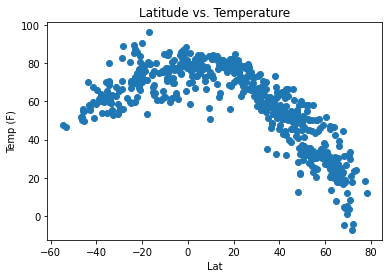

In [15]:
plt.scatter(lat, temp_f)
plt.title('Latitude vs. Temperature')
plt.xlabel('Lat')
plt.ylabel('Temp (F)')
plt.show()

## Latitude vs. Humidity Plot
Overall humidity is above 40% except for around the Tropics of Capricorn and Cancer, where there is a considerable dip. 

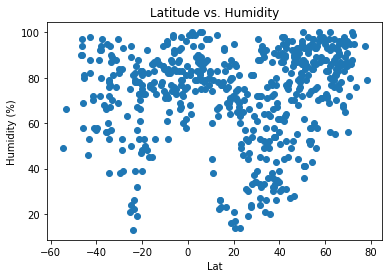

In [11]:
plt.scatter(lat, humidity)
plt.title('Latitude vs. Humidity')
plt.xlabel('Lat')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot
Relatively evenly distribution of cloud cover. With no clouds and full cloud cover happening a bit more often. 

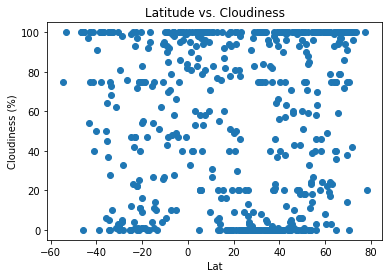

In [12]:
plt.scatter(lat, cloudiness)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Lat')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot
Wind speed stays mostly under 20 mph. Which seems fairly low, especially considering coastal areas. 

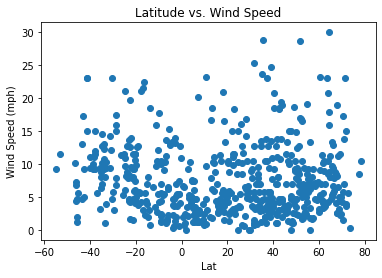

In [14]:
plt.scatter(lat, wind_speed)
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Lat')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

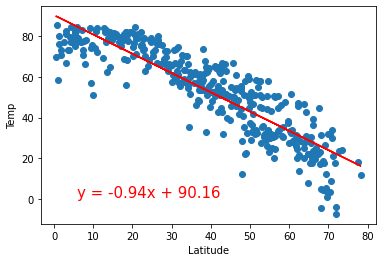

In [41]:
cities_north = total_cities[total_cities['Lat']>0]
x_values = cities_north['Lat']
y_values = cities_north['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

#Negative relationship between how far from you are to the equator and how hot the temperture is.  

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

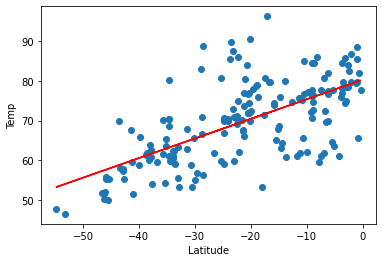

In [42]:
cities_south = total_cities[total_cities['Lat']<0]
x_values = cities_south['Lat']
y_values = cities_south['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

#Positive relationship between how close you are to the equator and how hot the temperture is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

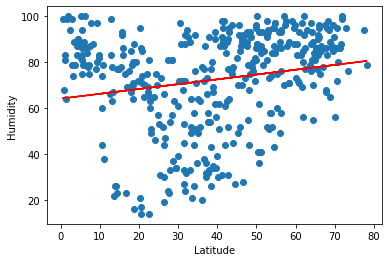

In [43]:
cities_north = total_cities[total_cities['Lat']>0]
x_values = cities_north['Lat']
y_values = cities_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

#Slight positive slope as you move toward the equator. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

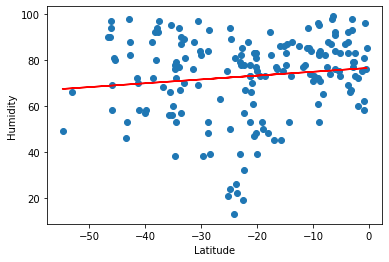

In [44]:
cities_south = total_cities[total_cities['Lat']<0]
x_values = cities_south['Lat']
y_values = cities_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

#Slight positive slope as you move toward the equator. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

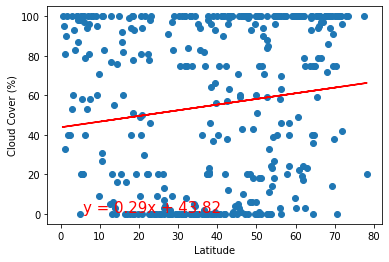

In [45]:
cities_north = total_cities[total_cities['Lat']>0]
x_values = cities_north['Lat']
y_values = cities_north['Cloud Cover (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')
plt.show()

#Slightly more cloudy as you move North from the equator

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

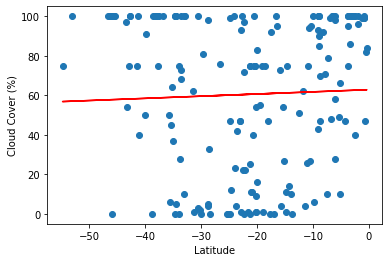

In [46]:
cities_south = total_cities[total_cities['Lat']<0]
x_values = cities_south['Lat']
y_values = cities_south['Cloud Cover (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')
plt.show()

#Very slight positive slope as you move toward the equator. Possibly little to no correlation between cloud cover and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

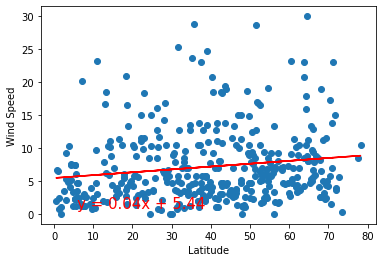

In [47]:
cities_north = total_cities[total_cities['Lat']>0]
x_values = cities_north['Lat']
y_values = cities_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

#Wind speed only increases by about 3 mph as you move North from the equator. Little to no evidence that latitude determines wind speed. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

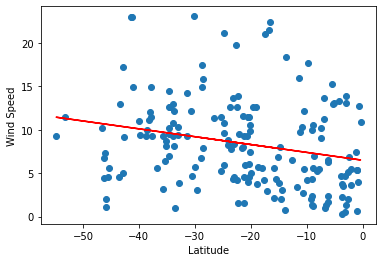

In [48]:
cities_south = total_cities[total_cities['Lat']<0]
x_values = cities_south['Lat']
y_values = cities_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

#Less wind speed as you move from the South pole and go North.  Might be partially shown because there are no cities in the North pole. Very windy there for the penguins, though.  